In [1]:
import os
os.chdir('Tacotron2_PyTorch/')

In [2]:
from Tacotron2_PyTorch.inference import *
import IPython

In [3]:
def generateMel(text: str):
    ckpt_pth = '../checkpoint/ckpt_200000'
    model = load_model(ckpt_pth)
    output = infer(text, model)
    return output

def preview(output):
    mel_outputs, mel_outputs_postnet, _ = output
    plt.figure(figsize=(20, 8))
    plt.imshow(to_arr(mel_outputs_postnet[0]))
    plt.title('Mel spectrogram')
    plt.show()

def previewAll(output):
    mel_outputs, mel_outputs_postnet, attention = output
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(to_arr(mel_outputs[0]))
    plt.title('Mel spectrogram')
    plt.subplot(1, 3, 2)
    plt.imshow(to_arr(mel_outputs_postnet[0]))
    plt.title('Mel spectrogram postnet')
    plt.subplot(1, 3, 3)
    plt.imshow(to_arr(attention[0]))
    plt.title('Attention')
    plt.show()

Terminated by gate.


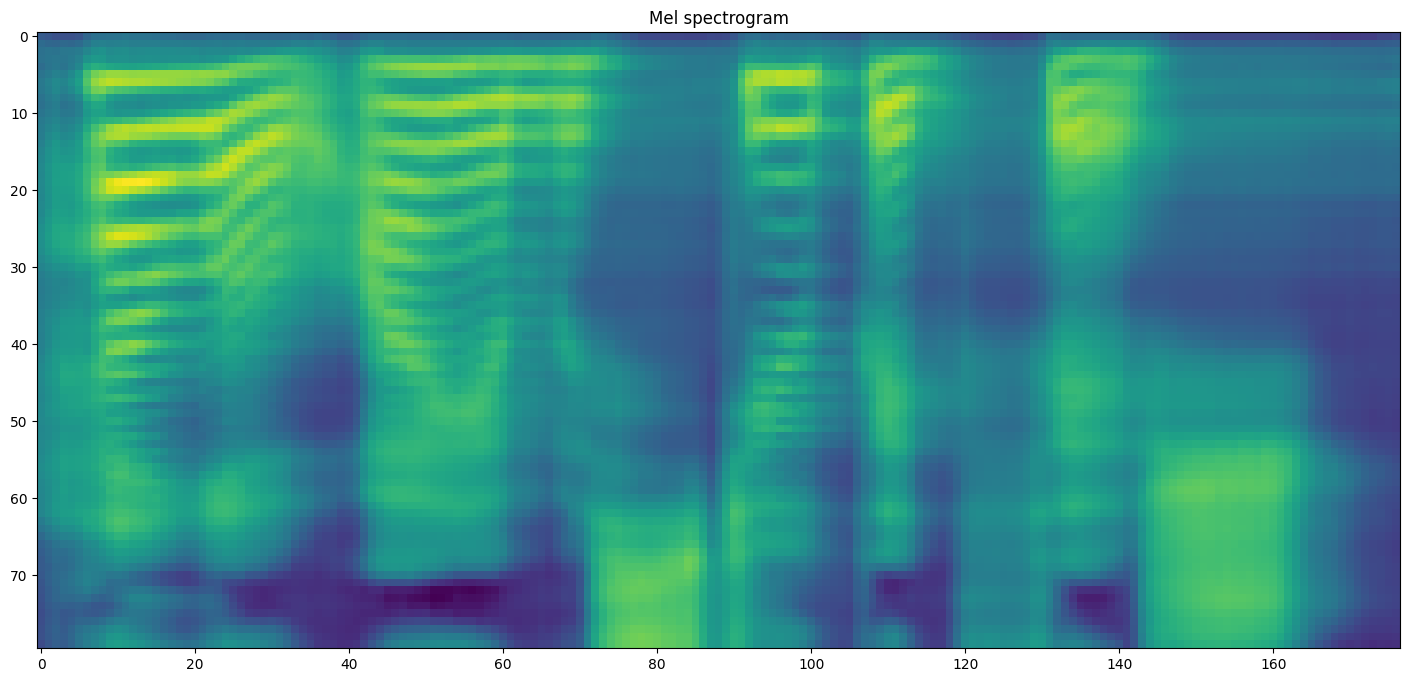

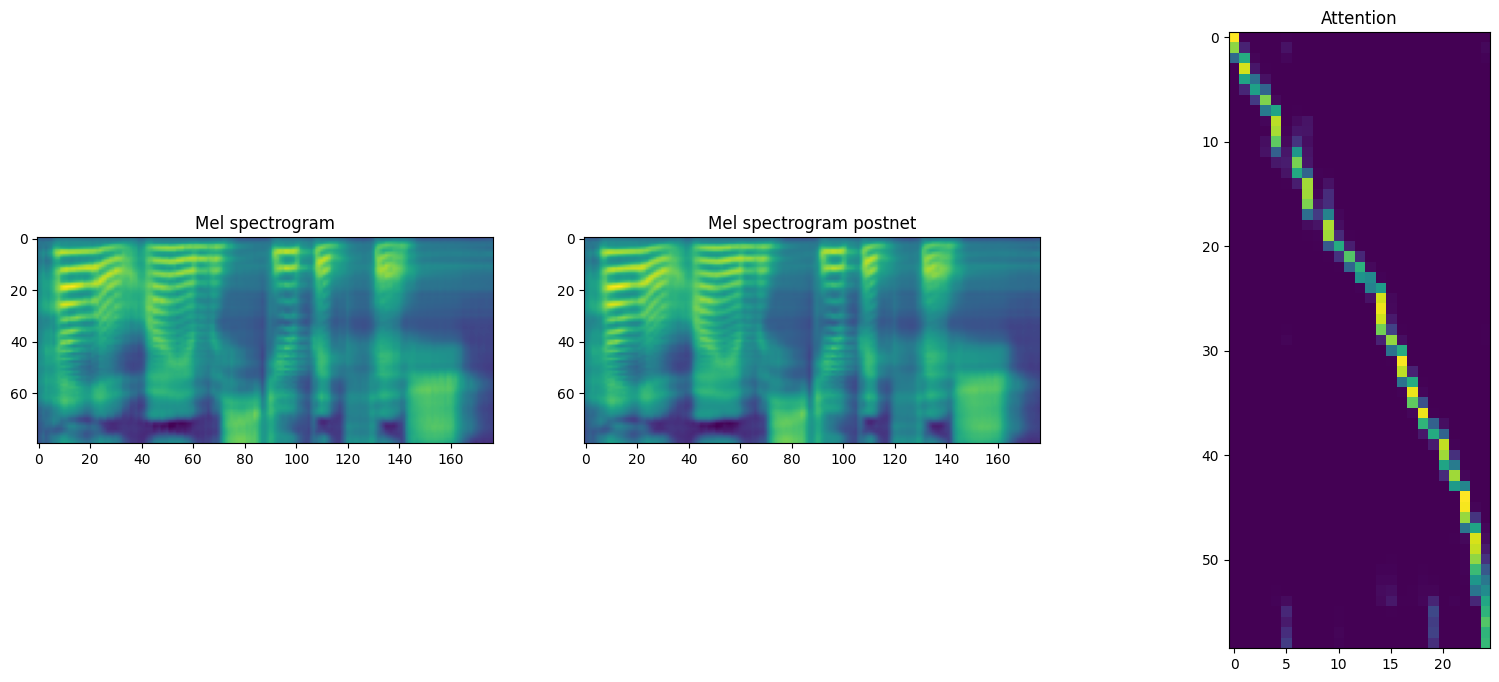

In [4]:
path = "../spectrograms"
text = "Hello, I am a stupid fish"

output = generateMel(text)
torch.save(output[1][0], f"{path}/mel.pt")
preview(output)
previewAll(output)

In [5]:
print(len(text))
print(to_arr(output[2][0]).shape)

25
(59, 25)
